# Light GBM

Light GBM은 Tree 기반의 Gradient Boosting 알고리즘 모델이다. Light GBM은 수평적으로 확장하는 leaf-wise 방식으로 기존 Tree의 level-wise보다 더 많은 loss를 줄일 수 있다. Ligth GBM은 큰 사이즈의 데이터를 적은 메모리 환경에서도 빠르게 처리할 수 있다. 또한 GPU에서의 학습 환경도 지원한다. 하지만, 적은 양의 데이터에서 과적합의 위험도가 높으므로 일정 이상(10,000 Row이상)의 데이터가 필요하다. 

<img src='./image/gbm_diff.png'>

In [3]:
# Light GBM 설치
!pip install lightgbm

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [12]:
import numpy as np
import pandas as pd
from collections import deque
from time import time
from datetime import timedelta
import lightgbm as lgbm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load Datasets

Light GBM을 제대로 활용 하기 위해서는 많은 양의 데이터가 필요하므로 Kaggle에 2020년 심장 질병 예측 데이터를 활용

In [17]:
heart_data = pd.read_csv('./data/heart_2020_cleaned.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [18]:
heart_data.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


## 2. EDA

In [52]:
def show_bar(df, cols, reverse_color=False):
    """
    :param df: (DataFrame) 바 차트를 그릴 데이터
    :param cols: (list[str]) 바 차트를 그릴 데이터의 칼럼들 (수치형 데이터)
    :param reverse_color: (bool) 제목, 라벨, 수치 컬러를 화이트로 할지 여부
    :return: None
    """
    # 범주형 변수 파이차트 그리기
    fig, axs = plt.subplots(1, len(cols), figsize=[16, 4])
    for i, col in enumerate(cols):
        # 카테고리별 개수 내림차순 정렬
        grp_df = df.groupby(by=col).size().sort_index(ascending=False)
        # 파이차트 그리기
        axs[i].bar(x=grp_df.index,
                   height=grp_df.values,
                   # color=
                   # autopct='%.1f%%',
                   # textprops={'color': "w" if reverse_color is True else 'black'}
                  )
        axs[i].set_title(col, color='w' if reverse_color is True else 'black')

    fig.tight_layout()
    plt.show()

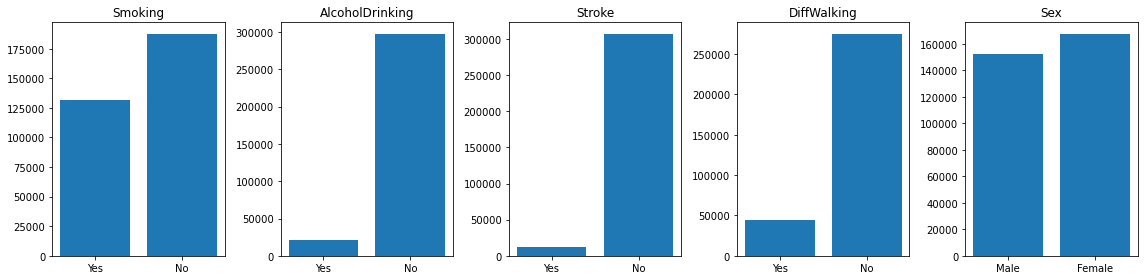

In [53]:
cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex']
show_bar(heart_data, cols)

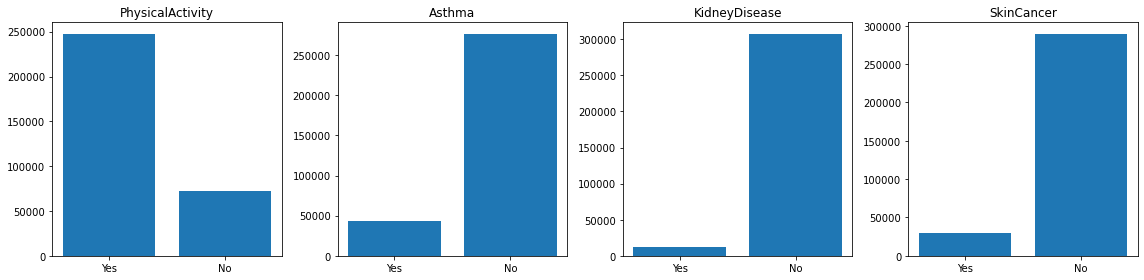

In [54]:
cols = ['PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
show_bar(heart_data, cols)

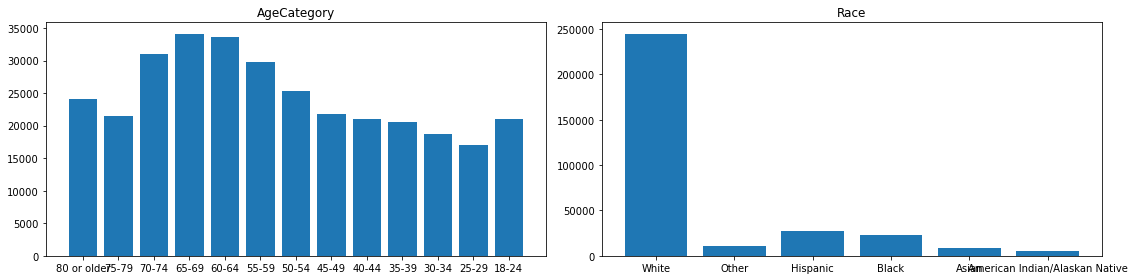

In [56]:
cols = ['AgeCategory', 'Race']
show_bar(heart_data, cols)

## 3. PreProcessing

In [16]:
# Label Encoding
def encoding(df):
    

ValueError: y should be a 1d array, got an array of shape (319795, 18) instead.